In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
AH = pd.read_csv('tips.csv', sep=",", header=0, index_col=False)

In [3]:
print(AH)

     num  total_bill   tip     sex smoker   day    time  size
0      1       16.99  3.00  Female     No   Sun  Dinner     2
1      2       10.34  3.00    Male     No   Sun  Dinner     3
2      3       21.01  0.00    Male     No   Sun  Dinner     3
3      4       23.68  0.00    Male     No   Sun  Dinner     2
4      5       24.59  0.00  Female     No   Sun  Dinner     4
..   ...         ...   ...     ...    ...   ...     ...   ...
239  240       29.03  5.92    Male     No   Sat  Dinner     3
240  241      100.18  2.00  Female    Yes   Sat  Dinner     2
241  242       22.67  2.00    Male    Yes   Sat  Dinner     2
242  243       17.82  1.75    Male     No   Sat  Dinner     2
243  244       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 8 columns]


In [5]:
tips = tips.drop(labels='Unnamed: 0', axis=1)
tips.head()

KeyError: "['Unnamed: 0'] not found in axis"

In [ ]:
#1 Сколько мужчин и сколько женщин заплатили чаевые
#t=tips['sex'].count()
tips[tips.tip > 0][['sex']].value_counts()



sex   
Male      157
Female     87
dtype: int64

In [ ]:
#2 Доля курящих среди мужчин и женщин
doly = tips[tips.smoker == "Yes"][['sex']].value_counts()
print( "Количество курящих посетителей:" )
print( doly, end = "\n\n" )

doly_Male = doly[0] / sum(doly) * 100
doly_Female = doly[1] / sum(doly) * 100
print( f"Доля курящих мужчин составляет: { round(doly_Male, 2) } %")
print( f"Доля курящих женщин составляет: { round(doly_Female, 2) } %")

Количество курящих посетителей:
sex   
Male      60
Female    33
dtype: int64

Доля курящих мужчин составляет: 64.52 %
Доля курящих женщин составляет: 35.48 %


In [ ]:
#3 Определим На какой день в среднем приходилось наибольшее количество посетителей? (учитывайте размер столика)

df=tips[ ['day','size'] ]
print(df)
df.groupby([ 'day']).sum()

      day  size
0     Sun     2
1     Sun     3
2     Sun     3
3     Sun     2
4     Sun     4
..    ...   ...
239   Sat     3
240   Sat     2
241   Sat     2
242   Sat     2
243  Thur     2

[244 rows x 2 columns]


,size
day,
Fri,40
Sat,219
Sun,216
Thur,152


In [ ]:
#4 На какое время суток приходится наибольшее количество чаевых

df=tips[['tip','time']]
df.groupby([ 'time']).sum()




,tip
time,
Dinner,546.07
Lunch,185.51


In [ ]:
#5 В какой день недели был заказ с максимальным счетом?

df=tips[['total_bill','day']]
df.groupby([ 'day']).max()


,total_bill
day,
Fri,40.17
Sat,50.81
Sun,48.17
Thur,43.11


In [ ]:
df=tips[['total_bill','day']]
df[df.total_bill==df.total_bill.max()][['day']]

,day
170,Sat


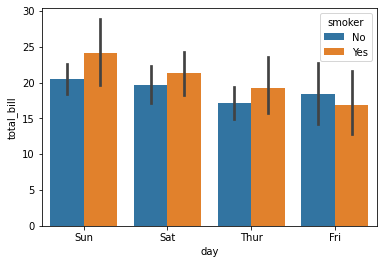

In [ ]:
#6 Постройте столбчатую гистограмму, где данные сгруппированы по дню недели (X) и медианное значение общего счета (Y).
# Столбцы для каждого дня должны учитывать, курит посетитель или нет


sns.barplot(x='day', y='total_bill', hue='smoker', data=tips)

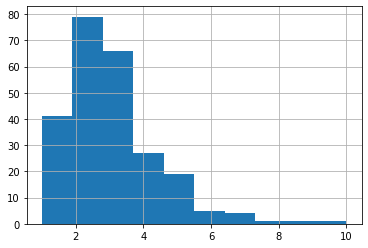

In [ ]:
#7 Построить гистограмму распределения целевого признака - чаевых (tips)

tips["tip"].hist()

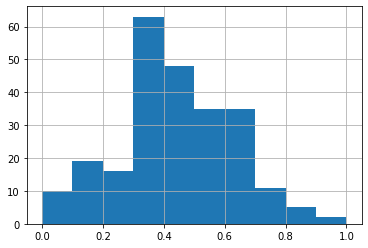

In [ ]:

x = np.log10(tips['tip'])
pd.Series(x).hist()

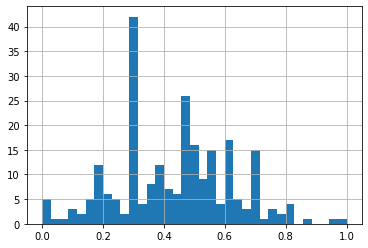

In [ ]:
pd.Series(x).hist(bins=35)

In [ ]:
#8 Преобразовать категориальные признаки (время суток, день) sklearn.preprocessing.OneHotEncoder и бинарные (пол, курение) в числовой вид
tips.head()
#tips['smoker'].replace({'Yes': True, 'No': False}, inplace=True) #inplace=True применить изменения к датасету

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,Female,No,Sun,Dinner,2
1,2,10.34,1.66,Male,No,Sun,Dinner,3
2,3,21.01,3.50,Male,No,Sun,Dinner,3
3,4,23.68,3.31,Male,No,Sun,Dinner,2
4,5,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips['sex'].replace({'Male': 1, 'Female': 0}, inplace=True)
tips['smoker'].replace({'Yes': 1, 'No': 0}, inplace=True)
tips['day'].replace({'Sun': 6, 'Sat': 7,'Thur': 4,'Fri': 5,}, inplace=True)
tips['time'].replace({'Dinner': 10, 'Lunch': 14}, inplace=True)


In [ ]:
tips.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,1,16.99,1.01,0,0,6,10,2
1,2,10.34,1.66,1,0,6,10,3
2,3,21.01,3.50,1,0,6,10,3
3,4,23.68,3.31,1,0,6,10,2
4,5,24.59,3.61,0,0,6,10,4


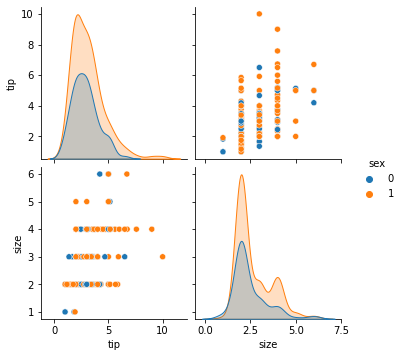

In [ ]:
#9 Построить seaborn.pairplot для признаков

sns.pairplot(tips, hue = 'sex', vars = ['tip', 'size'])

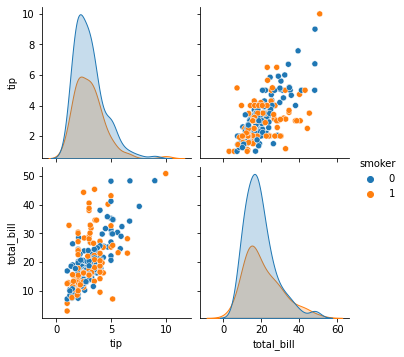

In [ ]:
#10 Построить диаграмму рассеяния в координатах чаевые/общий счет с hue='smoke'

sns.pairplot(tips, hue = 'smoker', vars = ['tip', 'total_bill'])